In [1]:
# Emma Jaud, Saumya Gupta, Ryan Clorfeine, Timothy Walker

# Starcraft
In this project we will be looking at a players actions to predict a players league using the Starcraft dataset

In [2]:
#starting imports
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time

In [3]:
%matplotlib inline

In [4]:
#reading in the data from csv
starcraft_data = pd.read_csv("Skillcraft_Dataset.csv")
starcraft_data

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [5]:
# cleaning data
starcraft_data.replace('?', np.NaN, inplace=True)

print("Total num missing values:\n\n", starcraft_data.isnull().sum())

Total num missing values:

 GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64


In [6]:
# line-wise deletion with null entries
starcraft_data_clean = starcraft_data.dropna()
starcraft_data_clean = starcraft_data_clean.astype(float)

# max out total hours for unreasonably high values
maxTotalHours = 5000
starcraft_data_clean['TotalHours'] = starcraft_data_clean['TotalHours'].where(starcraft_data_clean['TotalHours'] <= maxTotalHours, maxTotalHours) 

# max out weekly hours for unreasonably high values
maxHoursPerWeek = 70
starcraft_data_clean['HoursPerWeek'] = starcraft_data_clean['HoursPerWeek'].where(starcraft_data_clean['HoursPerWeek'] <= maxHoursPerWeek, maxHoursPerWeek) 


### Why eliminate null and LeagueIndex 8
In eliminating the entries with null inputs(Age, HoursPerWeek and TotalHours played), we also eliminate the LeagueIndex 8 which is Professional leagues. This also allows us to predict an average persons LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, and GrandMaster since the average person is most likely not on a Professional League. 

### Why max out TotalHours and HoursPerWeek
Unlike most features which are programatically gathered, Age, HoursPerWeek and TotalHours appear to be self-reported data. As such, there are a few instances where these features take on unreasonable values (like 168 hours played per week, or 100000 total hours). We set a maximum value for these features such that the algorithms are not affected by these outliers. The max values of 5000 and 70 were chosen for TotalHours and HoursPerWeek respectively, as they were seen as the most reasonable upper-limit of usefulness.


In [7]:
#checking to see if data has no missing values
print("Total num missing values:\n\n", starcraft_data_clean.isnull().sum())

Total num missing values:

 GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64


## Separate the feature columns from the class label column
For this next part we are seperating our feature columns from our class label which is LeagueIndex

In [8]:
starcraft_data_Y = starcraft_data_clean['LeagueIndex']
starcraft_data_X = starcraft_data_clean.drop(['LeagueIndex', 'GameID'],axis=1)

min 3.0
max 5000.0


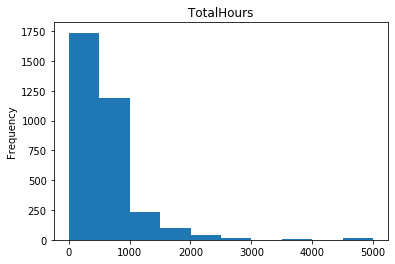

In [9]:
t = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']
sel = t[2]
column = starcraft_data_X[sel]
print("min", column.min())
print("max", column.max())
column.plot(kind='hist', title=sel)

## Naive Bayes

In [10]:
#Naive Bayes imports
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [11]:
model = GaussianNB()

scores = cross_val_score(model, starcraft_data_X, starcraft_data_Y, cv=10)
print(scores.mean())


0.3930057811500853


## KNN

In [12]:
#KNN imports

## SVMs

## Neural Nets

In [53]:
def validate_network(m, X, Y):
    results = [x-7*y for x, y in zip([min(7, round(7*p[0])) for p in m.predict(X)], Y)]
    buckets = [0]*4
    for r in results:
        if r==0:
            buckets[0] += 1
        elif abs(r)==1:
            buckets[1] += 1
        elif abs(r)==2:
            buckets[2] += 1
        else:
            buckets[3] += 1
    for i in range(3):
        print('within',i,'ranks',100*sum(buckets[:i+1])/sum(buckets),'percent of the time')
    return buckets
        

In [14]:
# validate_network(model, X_train, y_train)


In [17]:
from sklearn.model_selection import train_test_split
from keras.backend import clear_session
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer 
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [18]:
X_train, y_train = starcraft_data_X, starcraft_data_Y

In [19]:
# y_train /= max(y_train)
y_train /= 7
# y_test /= 7

y_train = y_train.values
# y_test = y_test.values



In [20]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

print()
print(X_train)
print(y_train)


[[ 1.27198242 -0.5171825   4.21877171 ... -0.29107556 -0.5380093
  -0.53437903]
 [ 0.32089829 -0.5171825   7.79868631 ... -0.82906572 -0.5380093
   0.24711416]
 [ 1.98529551 -0.5171825  -0.79310874 ... -0.29107556 -0.5380093
   0.17629523]
 ...
 [-0.15464377 -0.69537771 -0.97210447 ...  0.2469146  -0.5380093
  -0.53437903]
 [-0.3924148   1.08657438 -0.43511728 ... -0.82906572 -0.5380093
  -0.53437903]
 [ 0.08312726 -0.87357292 -0.43511728 ...  0.78490476 -0.5380093
  -0.33148145]]
[0.71428571 0.71428571 0.57142857 ... 0.57142857 0.42857143 0.57142857]


In [21]:
print(X_train.shape,
y_train.shape,
# X_test.shape,
# y_test.shape, 
      sep='\n')

(3338, 18)
(3338,)


### Defining a Keras model
We used the keras package to have more control over the structure and output of the learning model. Here is the architecture found to work best:
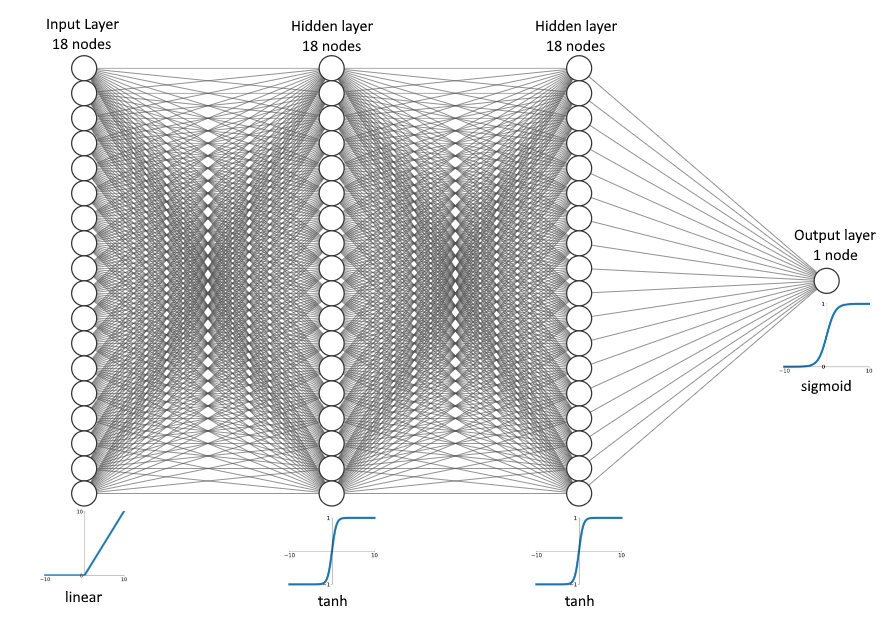
We experimented with the numbers of hidden layers (1, 2, 3), number of nodes per layer, activation functions (relu, tanh), having BatchNormalization and Dropout layers, and loss functions (Mean Squared Error, Mean Absolute Error). The prediction output is a number between 0 and 1, where 1 represents a rank of 7 while 0 represents a rank of 1.

In [43]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(18, input_dim=18, kernel_initializer='normal', activation='tanh'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.4))
    model.add(Dense(18, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    print(model.summary())
    return model

In [44]:
clear_session()
model = baseline_model()
model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.1, batch_size=5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 19        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
None
Train on 3004 samples, validate on 334 samples
Epoch 1/50
3004/3004 [==============================] - 1s 300us/step - loss: 0.0206 - val_loss: 0.0199
Epoch 2/50
3004/3004 [==============================] - 1s 189us/step - loss: 0.0178 - val_loss: 0.0197
Epoch 3/50
3004/3004 [==============================] - 1s 176us/step - loss: 0.0176 - val_loss: 0.0206
Epoch 4/50
3004/3004 [

In [45]:
validate_network(model, X_train, y_train)

within 0 ranks 44.09826243259437 percent of the time
within 1 ranks 91.76153385260635 percent of the time
within 2 ranks 99.61054523666867 percent of the time


## Wrapping the model
We wrap the keras model to look like an sklearn model so that we may use cross_val_score on it

In [55]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasModel(BaseEstimator, ClassifierMixin):  

    def __init__(self):
        self.model = baseline_model()

    def fit(self, X, y=None):
        self.model.fit(X, y, epochs=50, verbose=0, batch_size=5)
        return self

#     def _meaning(self, x):

    def predict(self, X):
        return(self.model.predict(X))

    def score(self, X, y):
        # 'score' expects a number, but we want to know the quality of predictions (exactly right, one-off, etc)
        # we add our scores to a global container and return 0
        scores.append(validate_network(self.model, X, y))
        return(0) 

## Final Model

In [56]:
model = KerasModel()
scores = []
cross_val_score(model, X_train, y_train, cv=5)
score


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_29 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 19        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_32 (Dense)             (None, 18)                342       
___________________________

array([0, 0, 0, 0, 0])

In [57]:
print(scores)

[[270, 337, 58, 3], [270, 334, 61, 3], [274, 327, 60, 7], [295, 299, 64, 9], [256, 336, 69, 6]]
